# Classification SVM (Support Vector Machine)

<img src="iris-versicolor.jpg" width="200"><img src="iris_setosa.jpg" width="200">

Groupe de travail, IRMA, 14 Janvier 2021

In [45]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.svm import SVC

import matplotlib.pyplot as plt

Algorithme d'apprentissage pour la classification : prévision d'une variable qualitative binaire

- Données : $(x_i) \in (\mathbb{R}^d)^n$

- Classe binaire : $y_i \in \{-1,1\}$

Exemple : classification de variété d'iris (bleu: versicolor, rouge: setosa)

In [46]:
iris = datasets.load_iris()
X = iris["data"][:, [2,3]]
y = np.array(iris["target"]) 


versicolor = (y == 1)
setosa = (y == 0)
virginica = (y == 2)

def plot_dataset1(axes):
    plt.scatter(X[versicolor,0], X[versicolor,1], c='blue')
    plt.scatter(X[setosa,0], X[setosa, 1], c='red')

    plt.xlabel("Longueur de la pétale")
    plt.ylabel("Largeur de la pétale")
    
    plt.axis([xmin, xmax, ymin, ymax])

xmin, xmax = 0, 6
ymin, ymax = 0, 2
axes1 = [xmin, xmax, ymin, ymax]

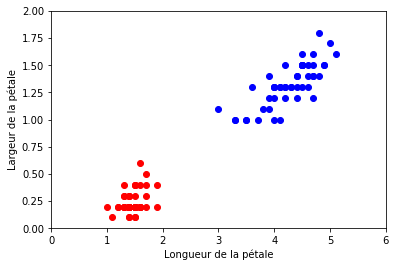

In [47]:
plot_dataset1(axes1)

**Objectif :** trouver un **hyperplan** qui **sépare** les données $(x_i)_i$ tout en étant le **plus distant possible** des données

- robustesse
- capacité de prévision la plus grande possible


Méthode introduite par V. Vapnik (~ 1995).

$\to$ généralisation à des séparations non linéaires 

$\to$ généralisation à la régression

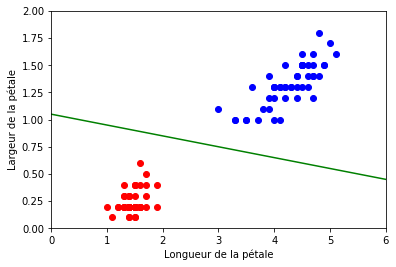

In [48]:
plot_dataset1(axes1)
Long = np.linspace(0,6,2)
Lar = -0.1*(Long - 2.5) + 0.8
plt.plot(Long, Lar, c='green')

## Plan 

1. Données séparables : SVM à marge rigide
2. Données non séparables : SVM à marge souple
3. Vecteurs de supports
4. Formulation duale
5. SVM non linéaire : noyaux de similarité

## 1. Données séparables : SVM à marge rigide

Recherche d'un hyperplan d'équation $\langle w, x\rangle + b = 0$, avec $w \in \mathbb{R}^d$ et $b \in \mathbb{R}$
tel que

$$
y = \text{sgn}\{\langle w, x\rangle + b\}
$$


**$\Rightarrow$ w, b défini à un scalaire près** 

**$\Rightarrow$ non-unicité de l'hyperplan** 

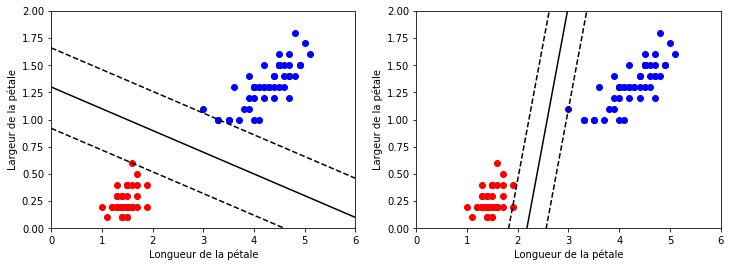

In [49]:
plt.figure(figsize=(12,4))

#------------------------------------------------------
plt.subplot(121)
plot_dataset1(axes1)

#droite et marge
Long = np.linspace(xmin, xmax, 2)
w = -0.2
Lar = w*(Long - 2.5) + 0.8
m = w*(Long - 1.6) + 0.6
M = w*(Long - 3.3) + 1.
plt.plot(Long, m, 'k--')
plt.plot(Long, M, 'k--')
plt.plot(Long, Lar, 'k')

#--------------------------------------------------
plt.subplot(122)
plot_dataset1(axes1)

#droite et marge
Long = np.linspace(xmin, xmax, 2)
w = 2.5
Lar = w*(Long - 2.5) + 0.8
m = w*(Long - 1.9) + 0.2
M = w*(Long - 3.) + 1.1
plt.plot(Long, m, 'k--')
plt.plot(Long, M, 'k--')
plt.plot(Long, Lar, 'k')

**Marge** : distance des points à l'hyperplan

$$m = \min_i \frac{|\langle w, x_i\rangle + b|}{||w||}$$

On souhaite que cette marge soit la plus grande possible. Pour cela, quitte à multiplier $w$ et $b$ par un scalaire, on impose : $\min_i |\langle w, x_i\rangle + b| = 1$. On a alors :

$$m = \frac{1}{||w||}$$

Maximiser la marge revient donc à demander à avoir l'hyperplan de normale la plus petite possible.

Text(0.6, -0.5, '$\\frac{1}{||w||}$')

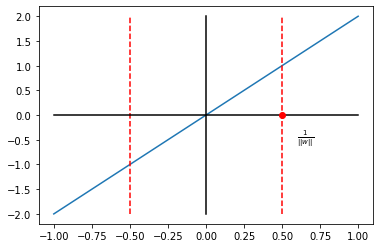

In [78]:
x = np.linspace(-1, 1, 100)
w = 2
plt.plot(x, w*x)
plt.plot([1/w,1/w], [-2,2], 'r--')
plt.plot([-1/w,-1/w], [-2,2], 'r--')
plt.plot(x, np.zeros_like(x), 'k-')
plt.plot([0,0], [-2,2], 'k-')
plt.plot([0.5],[0.], 'ro')
plt.text(0.6,-0.5, r'$\frac{1}{||w||}$')

---

Un **séparateur à vaste marge** est un discriminateur linéaire de la forme $f(x) = \text{sgn}\{\langle \bar w, x\rangle + \bar b\}$ où $\bar w \in \mathbb{R}^d$ et $\bar b \in \mathbb{R}$ sont solutions du problème d'optimisation:

$$
\boxed{
\underset{\begin{subarray}\ w \in \mathbb{R}^d,\ b \in \mathbb{R} \\
y_i\, (\langle w, x_i\rangle + b)\ \geqslant\ 1
\end{subarray}}{\min} \frac{1}{2}|| w ||^2
}
$$

On souhaite donc que que les points se trouvent à l'extérieur de la marge $|\langle \bar w, x\rangle + \bar b| \geqslant 1$ et que l'hyperplan soit le plus plat possible pour avoir la plus grande marge.

---

$\to$ problème d'**optimisation quadratique (QP)** sous contrainte affine


**Code Python :** module sklearn (Scikit-learn)

```python
# chargement des données
iris = datasets.load_iris()
X = iris["data"][:, [2,3]]
y = np.array(iris["target"]) 

versicolor = (y == 1)
setosa = (y == 0)
virginica = (y == 2)

test1 = versicolor | setosa

# parametrisation du problème d'optimisation 
svm_clf1 = SVC(kernel="linear", C=float("inf"))

# résolution du problème d'optimisation
svm_clf1.fit(X[test1],y[test1])

# prédiction
y_predict = svm_clf1.predict([[5.5,1.7]])

print('f([5.5, 1.7]) = ', y_predict[0] )
```

In [50]:
iris = datasets.load_iris()
X = iris["data"][:, [2,3]]
y = np.array(iris["target"]) 

versicolor = (y == 1)
setosa = (y == 0)
virginica = (y == 2)

test1 = versicolor | setosa

# parametrisation du problème d'optimisation 
svm_clf1 = SVC(kernel="linear", C=float("inf"))

# résolution du problème
svm_clf1.fit(X[test1],y[test1])

# prédiction
y_predict = svm_clf1.predict([[5.5,1.7]])
print('f([5.5, 1.7]) = ', y_predict[0] )

f([5.5, 1.7]) =  1


In [51]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_

    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

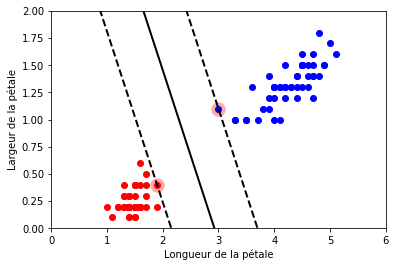

In [52]:
xmin, xmax = 0, 6
ymin, ymax = 0, 2

plot_svc_decision_boundary(svm_clf1, xmin, xmax)
plot_dataset1(axes1)

## 2. Données non séparables : SVM à marge souple

Données non séparables : impossibilité de trouver un hyperplan séparateur

$\to$ autorise les points à être l'intérieur de la marge


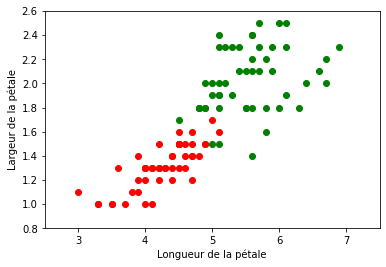

In [53]:
def plot_dataset2(axes):
    plt.scatter(X[versicolor,0], X[versicolor,1], c='red')
    plt.scatter(X[virginica, 0], X[virginica, 1], c='green')

    plt.xlabel("Longueur de la pétale")
    plt.ylabel("Largeur de la pétale")

    plt.axis(axes)

xmin, xmax = 2.5, 7.5
ymin, ymax = 0.8, 2.6
axes2 = [xmin, xmax, ymin, ymax]
plot_dataset2(axes2)

---
Un **séparateur à vaste marge souple** est un discriminateur linéaire de la forme $f(x) = \text{sgn}\{\langle \bar w, x\rangle + \bar b\}$ où $\bar w \in \mathbb{R}^d$ et $\bar b \in \mathbb{R}$ sont solutions du problème d'optimisation:

$$
\boxed{\underset{\begin{subarray}\ w \in \mathbb{R}^d,\ b \in \mathbb{R},\ \xi \in \mathbb{R}^n_+ \\
y_i\, (\langle w, x_i\rangle + b)\ \geqslant\ 1-\xi_i
\end{subarray}}{\min} \frac{1}{2}|| w ||^2 + C \sum_{i=1}^n \xi_i 
}
$$

où $\xi \in \mathbb{R}^n_+$ variables d'écart (empiètement de marge). $C > 0$ : paramètre d'équilibrage

---

- minimisation de l'empiètement

- problème d'**optimisation quadratique (QP)** sous contrainte affine

In [54]:
test2 = versicolor | virginica

# parametrisation du problème d'optimisation 
C1 = 1
svm_clf2 = SVC(kernel="linear", C=C1)

# résolution du problème
svm_clf2.fit(X[test2],y[test2])

# prédiction
y_predict = svm_clf2.predict([[5.5,1.7]])
print('f([5.5, 1.7]) = ', y_predict[0] )

f([5.5, 1.7]) =  2


### Résultat numérique pour différentes valeurs de C

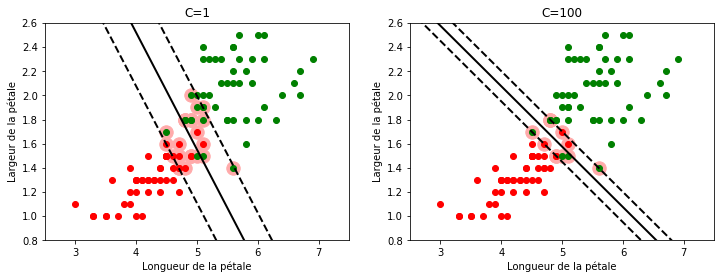

In [55]:
plt.figure(figsize=(12,4))

#------------------------------------------------------
plt.subplot(121)
plot_svc_decision_boundary(svm_clf2, xmin, xmax)
plot_dataset2(axes2)
plt.title('C='+str(C1))

#------------------------------------------------------
plt.subplot(122)
C2 = 100
svm_clf3 = SVC(kernel="linear", C=C2)
svm_clf3.fit(X[test2],y[test2])
plot_svc_decision_boundary(svm_clf3, xmin, xmax)
plt.title('C='+str(C2))
plot_dataset2(axes2)

$\to$ plus $C$ est petit plus il y a d'empiètement de marge MAIS empiètement peu d'erreurs

$\to$ $C$ paramètre de régularisation

## 3. Vecteurs supports

**Résolution** du problème de minimisation 

$\to$ condition d'optimalité de Kuhn-Tucker : $n$ multiplicateurs de Lagrange $\bar \lambda_i \geqslant 0$

\begin{align*}
\bar w - \sum_{i=1}^n \bar\lambda_i y_i\ x_i = 0\\
\sum_{i=1}^n \bar\lambda_i y_i = 0\\
\bar\lambda_i \big(y_i \big(\langle \bar w, x_i\rangle + \bar b\big) - 1\big) = 0\\
\big(y_i \big(\langle \bar w, x_i\rangle + \bar b\big) - 1\big) \geqslant 0\\
\bar\lambda_i \geqslant 0
\end{align*}

$\to$ **vecteurs supports** : $\mathcal{A} = \left\{i \text{ tel que } \bar\lambda_i > 0\right\}$. Ces points sont sur le bord de la marge (contrainte active) : $y_i \big(\langle \bar w, x_i\rangle + \bar b\big) = 1$.

\begin{equation*}
\boxed{\bar w = \sum_{i \in \mathcal{A}} \bar\lambda_i y_i\ x_i}
\end{equation*}

On peut écrire également :
\begin{equation*}
f(x) = \text{sgn}\left\{\sum_{i \in \mathcal{A}} \bar\lambda_i y_i \langle x_i, x\rangle + b\right\}
\end{equation*}

$\to$ évaluation ne dépend que des vecteurs supports

# 4. Formulation duale

On introduit le Lagrangien :

\begin{equation*}
\mathcal{L}(w, b, \lambda) = \frac{1}{2}|| w ||^2 + \sum_{i=1}^n \lambda_i \Big(1-y_i\, \big(\langle w, x_i\rangle + b\big)\Big)
\end{equation*}


$(\bar w, \bar b, \bar \lambda)$: point selle du Lagrangien

$$
\mathcal{L}(\bar w, \bar b, \bar \lambda) = \underset{\text{Problème primal}}{\boxed{\min_{(w,b) \in \mathbb{R}^d\times\mathbb{R}} \max_{\lambda \in \mathbb{R}_+^n}  \mathcal{L}(w, b, \lambda)}} = \underset{\text{Problème dual}}{\boxed{\max_{\lambda \in \mathbb{R}_+^n} \min_{(w,b) \in \mathbb{R}^d\times\mathbb{R}}  \mathcal{L}(w, b, \lambda)}}
$$



**Problème dual** : 
$$
\boxed{\max_{\lambda \in \mathbb{R}_+^n} \min_{(w,b) \in \mathbb{R}^d\times\mathbb{R}}  \mathcal{L}(w, b, \lambda)}
$$


Résolution du problème de minimisation $(w_\lambda, b_\lambda)$ satisfait :
\begin{align*}
w_\lambda - \sum_{i=1}^n \lambda_i y_i\ x_i = 0\\
\sum_{i=1}^n \lambda_i y_i = 0
\end{align*}
Donc nous avons :
\begin{align*}
\min_{(w,b) \in \mathbb{R}^d\times\mathbb{R}} \mathcal{L}(w, b, \lambda) = \mathcal{L}(w_\lambda, b_\lambda, \lambda) &=  \frac{1}{2}|| w_\lambda ||^2 + \sum_i \lambda_i \Big(1-y_i\, \big(\langle w_\lambda, x_i\rangle + b_\lambda\big)\Big)\\
&= \sum_{i,j} \lambda_i\lambda_j y_i y_j \langle x_j, x_i\rangle + \sum_i \lambda_i
\end{align*}

Problème dual :
\begin{equation*}
\boxed{\max_{\begin{subarray}\ \lambda_i \in \mathbb{R}_+\\
\sum_i \lambda_i y_i = 0
\end{subarray}} \sum_{i,j} \lambda_i\lambda_j y_i y_j \langle x_j, x_i\rangle + \sum_i \lambda_i}
\end{equation*}

$G = \Big(\langle y_i x_i, y_j x_j\rangle\Big)_{i,j}$ : matrice des influences de chaque couple de point

# 4. SVM non linéaire : noyaux de similarité

**Principe :** appliquer des transformation non-linéaire sur les données pour linéariser la frontière
\begin{equation*}
f(x) = \text{sgn}\left\{ \langle w, \Phi(x)\rangle + b\right\}
\end{equation*}

avec $\Phi : \mathbb{R}^{d} \to \mathbb{R}^{d'}$ avec $d' > d$.

Exemple: $\Phi : x \in \mathbb{R}^2 \mapsto (x_1^2, x_2^2, \sqrt{2} x_1 x_2) \in \mathbb{R}^3$ 

$\to$ **Remplacer** le produit scalaire par un **noyau de similarité** : $k(x,x') = \langle \Phi(x), \Phi(x')\rangle_{\mathbb{R}^3}$

Résolution du problème dual:
\begin{equation*}
\boxed{\max_{\begin{subarray}\ \lambda_i \in \mathbb{R}_+\\
\sum_i \lambda_i y_i = 0
\end{subarray}} \sum_{i,j=1}^n \lambda_i\lambda_j y_i y_j k(x_j, x_i) + \sum_{i=1}^n \lambda_i}
\end{equation*}


Plus généralement, on considère des **noyaux positifs**, c'est à dire tel que la matrice de Gram $\Big(k(x_i, x_j)\Big)_{i,j}$ est positive quelque soit le jeu de données $(x_i)$

Exemples : 

- noyau polynomial : $k(x,x') = (c + \langle x, x'\rangle)^p$
- noyau Gaussien : $k(x,x') = \exp(-\frac{||x-x'||^2}{2\sigma^2})$

$\to$ calcul dans l'espace $\mathbb{R}^d$ et non pas dans $\mathbb{R}^{d'}$

**Exemple :** jeu de donées `moons`

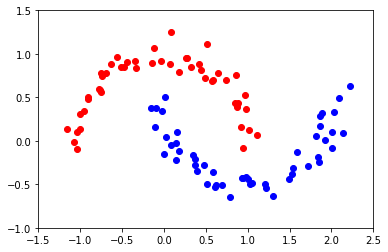

In [56]:
X, y = datasets.make_moons(noise=0.1)

def plot_dataset3(axes):
    plt.scatter(X[y==0,0], X[y==0,1], c='red')
    plt.scatter(X[y==1,0], X[y==1,1], c='blue')
    plt.axis(axes)
    
xmin, xmax = -1.5, 2.5
ymin, ymax = -1, 1.5
axes3 = [xmin, xmax, ymin, ymax]
plot_dataset3(axes3)

In [57]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)


```python 
deg = 3
kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=deg, coef0=1, C=5))
])

kernel_svm_clf.fit(X,y)

plot_predictions(kernel_svm_clf, axes3)
plot_dataset3(axes3)
```

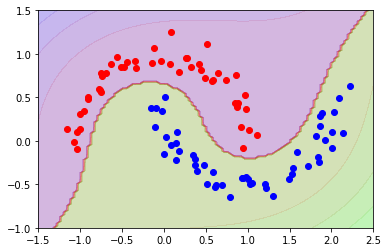

In [58]:
deg = 3
kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=deg, coef0=1, C=5))
])

kernel_svm_clf.fit(X,y)

plot_predictions(kernel_svm_clf, axes3)
plot_dataset3(axes3)

**Comparaison pour différents noyaux polynomiaux**

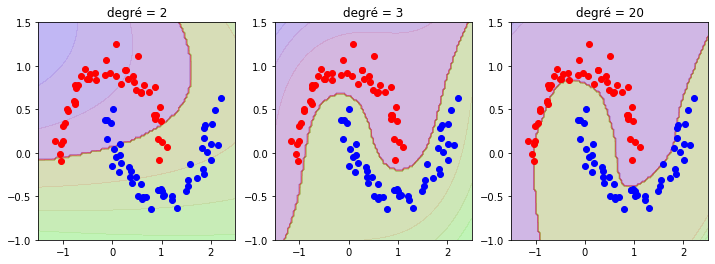

In [59]:
plt.figure(figsize=(12,4))

#------------------------------------------------------
plt.subplot(131)
deg3 = 2
kernel_svm_clf3 = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=2, coef0=1, C=5))
])

kernel_svm_clf3.fit(X,y)

plot_predictions(kernel_svm_clf3, axes3)
plot_dataset3(axes3)
plt.title("degré = "+str(deg3))

#------------------------------------------------------
plt.subplot(132)
plot_predictions(kernel_svm_clf, axes3)
plot_dataset3(axes3)
plt.title("degré = "+str(deg))

#------------------------------------------------------
plt.subplot(133)
deg2=20
kernel_svm_clf2 = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=deg2, coef0=1, C=5))
])

kernel_svm_clf2.fit(X,y)

plt.title("degré = "+str(deg2))
plot_predictions(kernel_svm_clf2, axes3)
plot_dataset3(axes3)

$\to$ sous-ajustement pour degré faible / sur-ajustement pour degré élevé

## Références :

- http://wikistat.fr/ : Machines à vecteurs supports 
-  A. Géron, Hands-on Machine Learning with Scikit-Learn and TensorFlow, O'Reilly